In [20]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv

In [21]:
try:
    parser = argparse.ArgumentParser(description="Simple argument parser")
    parser.add_argument("-c", action="store", dest="config_file")
    result = parser.parse_args()
    config_file=result.config_file
    parser = ConfigParser()
    parser.read(config_file)
    parser.sections()
except SystemExit: 
    print("SystemExit")
    parser = ConfigParser()
    parser.read('config_TSEOBNRE.ini')
    parser.sections()
    pass

sxs_root_folder="/work/francisco.jimenez/SXS/data/"

# Define the path to the nr files
model=parser.get('setup','model')
export_folder='/work/kailai.wang/Eccentricity_project/export_folder/sxs_mismatch_seobhm/'
export_bool=eval(parser.get('setup','export'))
eccentric_index=int(parser.get('setup','index'))
eccentric_file_index=int(parser.get('setup','file_index'))
export_bool=True
print(eccentric_index)
if not os.path.exists(export_folder):
    os.mkdir(export_folder)
    print("Directory " , export_folder ,  " Created ")

#eccentric_cases = pd.read_csv(r'SXS_eccentric_'+str(eccentric_file_index)+'.csv')
#eccentric_cases_list = eccentric_cases['SXS_eccentric'][:]
eccentric_cases = pd.read_csv(r'SXS_Good_Cases.csv')
eccentric_cases_list = eccentric_cases['SXS_GOOD']
eccentric_cases_list = np.array(eccentric_cases_list)
#print(len(eccentric_cases_list))

sxs_file_list=[]
json_metafiles=[]


for i in range(0,len(eccentric_cases_list)):
    eccentric_cases_list[i]="SXS_BBH_"+eccentric_cases_list[i][-4:]

print(eccentric_cases_list)

for i in range(0,len(eccentric_cases_list)):
    sxs_file=[]
    json_metafile=[]
    eccentric_case = sxs_root_folder+eccentric_cases_list[i]
    #print(eccentric_case)
    sxs_file = glob.glob(eccentric_case+'/*/rhOverM_Asymptotic_GeometricUnits_CoM.h5')
    if sxs_file == []:
        sxs_file = glob.glob(eccentric_case+'/rhOverM_Asymptotic_GeometricUnits_CoM.h5')
    sxs_file.sort(reverse=True)
    sxs_file=sxs_file[0:1]
    #print(sxs_file)
    sxs_file_list.append(sxs_file)

    json_metafile = (glob.glob(eccentric_case+"/*/metadata.json", recursive = True))
    if json_metafile == []:
        json_metafile = glob.glob(eccentric_case+'/metadata.json')
    json_metafile.sort(reverse=True)
    json_metafile=json_metafile[0:1]
    json_metafiles.append(json_metafile)

# print(len(sxs_file_list))
# print(sxs_file_list)
# print(len(json_metafiles))
# print(json_metafiles)





SystemExit
0
['SXS_BBH_0069' 'SXS_BBH_0074' 'SXS_BBH_0078' 'SXS_BBH_0082'
 'SXS_BBH_0083' 'SXS_BBH_0087' 'SXS_BBH_0088' 'SXS_BBH_0089'
 'SXS_BBH_0091' 'SXS_BBH_0094' 'SXS_BBH_0097' 'SXS_BBH_0098'
 'SXS_BBH_0100' 'SXS_BBH_0105' 'SXS_BBH_0106' 'SXS_BBH_0108'
 'SXS_BBH_0147' 'SXS_BBH_0179' 'SXS_BBH_0309' 'SXS_BBH_0320'
 'SXS_BBH_0321' 'SXS_BBH_0322' 'SXS_BBH_0323' 'SXS_BBH_0832'
 'SXS_BBH_1136' 'SXS_BBH_1149' 'SXS_BBH_1160' 'SXS_BBH_1169'
 'SXS_BBH_1176' 'SXS_BBH_1180' 'SXS_BBH_1181' 'SXS_BBH_1355'
 'SXS_BBH_1356' 'SXS_BBH_1357' 'SXS_BBH_1358' 'SXS_BBH_1359'
 'SXS_BBH_1360' 'SXS_BBH_1361' 'SXS_BBH_1364' 'SXS_BBH_1365'
 'SXS_BBH_1366' 'SXS_BBH_1367' 'SXS_BBH_1368' 'SXS_BBH_1371'
 'SXS_BBH_1372' 'SXS_BBH_1373' 'SXS_BBH_1388']


usage: ipykernel_launcher.py [-h] [-c CONFIG_FILE]
ipykernel_launcher.py: error: unrecognized arguments: -f /work/kailai.wang/.local/share/jupyter/runtime/kernel-88a35072-7b57-44fb-87f2-2628948235c7.json


In [22]:
# bvals1361=np.array([0.20846699,13.60933172])
# bvals=bvals1361
bvals=[]
model='SEOBNREHM'
mass=100


In [30]:
print(json_metafiles[46])

['/work/francisco.jimenez/SXS/data/SXS_BBH_1388/metadata.json']


In [31]:
print(json_metafiles[46][0])

/work/francisco.jimenez/SXS/data/SXS_BBH_1388/metadata.json


started
sxs_file is /work/francisco.jimenez/SXS/data/SXS_BBH_1388/rhOverM_Asymptotic_GeometricUnits_CoM.h5
metafile is ['/work/francisco.jimenez/SXS/data/SXS_BBH_1388/metadata.json']
SXS:BBH:1388


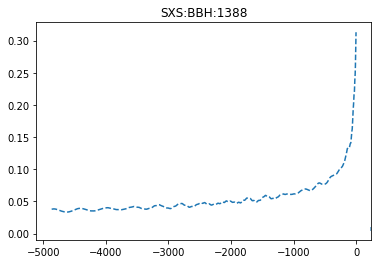

massratio:  2.9997249489341864
mass1:  74.9935987334
mass2:  25.000158351200003
spin1:  0.38764549519
spin2:  0.544460883006
Meta eccentricity 0.0430927
eccentricity estimate:  0.030590702695795884
Initial physical frequency:  11.494189152645468
Initial time (got cut 200):  -4866.822967131328
Model is  SEOBNREHM
Running dynesty...


26it [04:27, 10.28s/it, +10 | bound: 0 | nc: 1 | ncall: 128 | eff(%): 30.508 | loglstar:   -inf < -0.011 <    inf | logz: -0.143 +/-    nan | dlogz:  0.009 >  0.100]


Summary
nlive: 10
niter: 26
ncall: 118
eff(%): 30.508
logz: -0.143 +/-  0.084


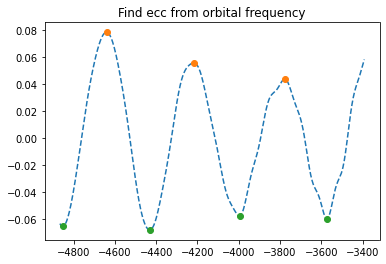

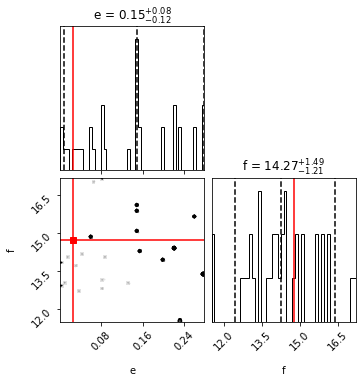

bvals: [ 0.02676482 14.75105563]


/work/kailai.wang/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/work/kailai.wang/venv/lib/python3.7/site-packages/scipy/interpolate/_bsplines.py:327: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)


Mismatch: 0.008638433921331234
Max mismatch found: 0.02999850998431708


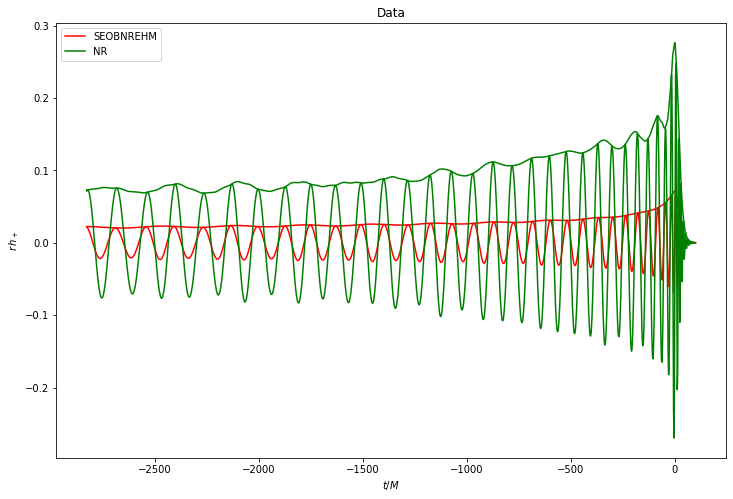

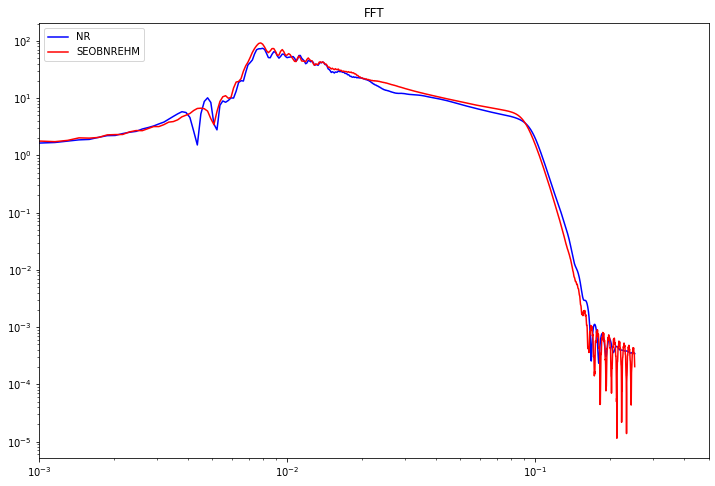

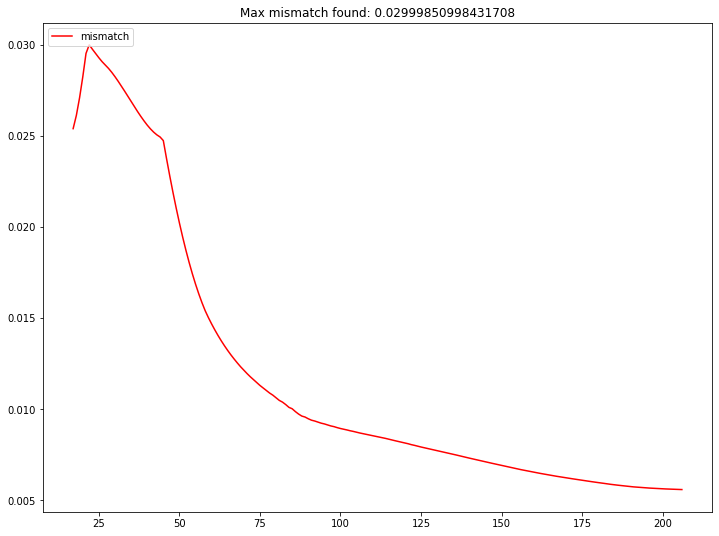

In [32]:
print("started")
# Load SXS metadata
metadata = {}
#for i in range(0,len(json_metafiles)):
export_bool=True
for i in range(46,47):
    
    sxs_file=sxs_file_list[i][0]
    print("sxs_file is "+ str(sxs_file))
    with open(json_metafiles[i][0]) as file:
        metadata = json.load(file)
    print("metafile is "+str(json_metafiles[i]))
    

    #mass = mass
    BBH_name=metadata['alternative_names']
    print(BBH_name)
    mass1 = mass*metadata['reference_mass1']
    mass2 = mass*metadata['reference_mass2']
    massratio = max(mass1/mass2,1)
    spin1 = metadata['reference_dimensionless_spin1'][-1]
    spin2 = metadata['reference_dimensionless_spin2'][-1]
    omega_0 =2*metadata["initial_orbital_frequency"]
    initial_freq=omega_0/(2*np.pi)
    T_0= 2*np.pi/omega_0
    f_0 = omega_0/(2*np.pi)
    # Load SXS data
    gw = {}
    gw = h5py.File(sxs_file, 'r') 

    gw_sxs_bbh = gw["Extrapolated_N3.dir"]["Y_l2_m2.dat"] 
    times = gw_sxs_bbh[:,0]
    dt=fun.time_to_t_NR(1/1024.,mass)
    sxs_wave=gw_sxs_bbh[:,1]-1j*gw_sxs_bbh[:,2]
    tmrg = times[np.argmax(np.abs(sxs_wave))]
    times = times - tmrg
    times_nr=times
    sxs_wave_nr = sxs_wave

    sxs_wave_int=interp1d(times, sxs_wave, kind='cubic')
    times= np.arange(times[0], times[-1], dt)
    sxs_wave = sxs_wave_int(times)
    sxs_wave = sxs_wave[np.argmax(times >= (times[0]+1000)):np.argmax(times >= (-0))]
    times = times[np.argmax(times >= (times[0]+1000)):np.argmax(times >= (-0))]


    sxsphas = np.angle(sxs_wave)
    sxsphas = np.unwrap(sxsphas)
    sxsfreq = np.gradient(sxsphas, times)
    sxsfreq_int = interp1d(times,sxsfreq,kind='cubic')
    plt.plot(times, sxsfreq, '--', label=r'$\Re{(Rh_{22}/(M\nu))}$')
    plt.axhline(initial_freq,mass)
    plt.axhline(1.5*initial_freq,mass)
    plt.title(BBH_name)
    plt.show()

    #def estimate_ecc():
    # Find the true anomaly, reference eccentricity and other parameters from metadata
    di=metadata['initial_separation']
    ecc_meta=metadata['reference_eccentricity']
    #mean_anomaly=metadata['reference_mean_anomaly']
    #true_anomaly=mean_anomaly+(2*ecc_nr-ecc_nr**3/4)*np.sin(mean_anomaly)+5/4*ecc_nr**2*np.sin(2*mean_anomaly)+13/12*ecc_nr**3*np.sin(3*mean_anomaly)
    #perihelion=di*(1+ecc_nr*np.cos(true_anomaly))/(1-ecc_nr**2)
    #(perihelion**2)*metadata['initial_adot']
    #print(di)
    #print(ecc_nr)
    # Find eccentricity from orbital frequency
    bool_fact=times<=times[0]+100+8*T_0
    times_fit=times[bool_fact]
    sxsfreq_fit=sxsfreq[bool_fact]
    freqcfit=np.polyfit(times_fit, sxsfreq_fit, 2)
    sxsfreq_fitc = np.poly1d(freqcfit)
    sxsfreq_ecc_estimate=1-sxsfreq_fit/sxsfreq_fitc(times_fit)
    sxsfreq_ecc_estimate=fun.moving_average(sxsfreq_ecc_estimate, 20)
    times_fit = times_fit[:-19]
    peaks_pos=find_peaks(sxsfreq_ecc_estimate, height=0)
    peaks_neg=find_peaks(-sxsfreq_ecc_estimate, height=-0)
    plt.plot(times_fit, sxsfreq_ecc_estimate, '--', label=r'$circular$')
    plt.plot(times_fit[peaks_pos[0]], peaks_pos[1]['peak_heights'], 'o', label=r'$circular$')
    plt.plot(times_fit[peaks_neg[0]],-peaks_neg[1]['peak_heights'], 'o', label=r'$circular$')
    plt.title("Find ecc from orbital frequency")

    # eccentricity estimate as in Eq. 2.8 odf 1909.11011
    wp =omega_0*(1 + np.mean(peaks_pos[1]['peak_heights']))
    wa =omega_0*(1 - np.mean(peaks_neg[1]['peak_heights']))
    if wa>=0:
        ecc_NR = (wp**0.5 - wa**0.5)/(wp**0.5 + wa**0.5)
    else:
        ecc_NR=ecc_meta
    initial_freq_phys=fun.f_to_Phys(initial_freq,mass)
    print('massratio: ',massratio)
    print('mass1: ',mass1)
    print('mass2: ',mass2)
    print('spin1: ',spin1)
    print('spin2: ',spin2)
    print("Meta eccentricity" ,ecc_meta)
    print('eccentricity estimate: ', ecc_NR)
    #print('Initial seperation: ',di)
    print('Initial physical frequency: ', fun.f_to_Phys(initial_freq,mass))
    print('Initial time (got cut 200): ', times[0])
    print('Model is ', model)
    #def dynesty():
    emin=0
    distance = 100; inclination = 0; l=2; m=2; 
    emax=0.3
    if float(ecc_meta)>emax:
        emax=0.6
    ecc_clas=fun.Eccentricity_PE([mass1,mass2,spin1,spin2,distance],
                          sxsfreq_int,model=model,times=times,sxsfreq=sxsfreq,
                          emin=emin,emax=emax,fmin=initial_freq_phys,fmax=1.5*initial_freq_phys)
    ecc_clas.log_likelihood([0.1,10])
    bvals=[]
    #bvals=np.array([ 0.07866326, 13.50010003])
    if bvals==[]:
        print("Running dynesty...")
        #Define min and max eccentricity for the priors
        pool = choose_pool(8)
        pool.size=8
        nlive = 10
        f2=dynesty.NestedSampler(ecc_clas.log_likelihood,ecc_clas.prior_transform,
                         2,nlive=nlive,sample='rwalk',pool=pool)
        f2.run_nested(print_progress=True,dlogz=0.10)
        pool.close()
        res = f2.results
        res.samples_u.shape
        res.summary()
        samps=f2.results.samples
        postsamps = fun.posterior_samples(f2)
        bvals = postsamps[-1]
        fg=corner.corner(postsamps,quantiles=[0.05,0.5,0.95],show_titles=True,max_n_ticks = 4,bins=50,truths=bvals,labels=['e','f'],truth_color='red')
        plt.show()
    else:
        print("Skipped dynesty...")
        bvals=bvals
    print("bvals: "+ str(bvals))
    #----------------------------------------------------------------------
    sxswavename=eccentric_cases_list[i]
    info_name=['name','massratio', 'mass1', 'mass2', 'spin1', 'spin2', 'meta_ecc', 'est_ecc', 'f0', 'ecc_bvals', 'f_bvals', 'times[0] (after the sxs 200 cut)']
    info_value=[sxswavename,massratio, mass1, mass2, spin1, spin2, ecc_meta, ecc_NR, fun.f_to_Phys(initial_freq,mass), bvals[0], bvals[1], float(times[0])]
    
    

    export_info=export_folder+'/model_'+model+'_'+sxswavename+'_massratio_'+str(np.around(massratio,2))+'_spin1_'+str(np.around(spin1,2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccNR_'+str(np.around(float(ecc_meta),3))+'.csv'
    export_mismatch=export_folder+'/rit_mismatch_'+model+'_'+sxswavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(ecc_meta),3))+'.csv'
    mismatch_plot=export_folder+'/mismatchplot_'+model+'_'+sxswavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(ecc_meta),3))+'.png'
    wave_td_plot=export_folder+'/td_plot_'+model+'_'+sxswavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(ecc_meta),3))+'.png'
    wave_fd_plot=export_folder+'/fd_plot_'+model+'_'+sxswavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(ecc_meta),3))+'.png'



    if export_bool:
        with open(export_info,'w') as file:
            writer =csv.writer(file)
            writer.writerow(info_name)
            writer.writerow(info_value)


    model='SEOBNREHM'
    #def final_wave():
    dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
    times_seobe, h_seobe_nr= (dict[model])(bvals,strain=True)
    times_seobe_phys = fun.time_to_t_Phys(times_seobe,mass)
    h_seobe_phys = fun.amp_to_phys(h_seobe_nr,mass,distance,2,2,0)

    #def plot_the_data():
    if times_seobe[0]>=times[0]:
        times_seobe_v1 = times_seobe[:np.argmax(times_seobe >= (100))]
        h_seobe_nr = h_seobe_nr[:np.argmax(times_seobe >= (100))]
        sxs_wave = sxs_wave_int(times_seobe_v1)
        times = times_seobe_v1
    else:
        times = np.arange(times[0], 100, dt)
        sxs_wave = sxs_wave_int(times)
        eob_int=interp1d(times_seobe, h_seobe_nr, kind='cubic')
        h_seobe_nr=eob_int(times)
    # plot the nr data in phys. units
    figband = plt.figure(figsize = (12, 8))
    paper_prefactor=0.204124145232
    plt.plot(times, 0.25*h_seobe_nr.real, label=model,color='r')
    plt.plot(times, 0.25*np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

    #   plt.plot(times, 0.19*h_seobe_nr*(np.exp(1j*3.14)).real, label=model,color='r')
    #   plt.plot(times, 0.19*np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

    plt.plot(times, sxs_wave.real, label='NR',color='g')
    plt.plot(times, np.sqrt(sxs_wave.real**2+sxs_wave.imag**2),color='g',label=None)
    plt.xlabel(r'$t/M$')
    plt.ylabel(r'$r \, h_+$')
    #plt.xlim(-2000,200)
    plt.title(r'inclination = '+str(inclination/np.pi))
    plt.legend(loc='upper left')
    plt.title("Data")
    if export_bool:
        figband.savefig(wave_td_plot)
    #fourier and another plot
    h_px=np.array([times,sxs_wave]).T 
    h_eob=np.array([times,h_seobe_nr]).T 
    tlow_nr = h_eob[0,0]+ 150
    thigh_nr = 150
    sigmalo = 100

    tlow_eob = h_eob[0,0]+ 150
    thigh_eob = 150

    px_fft=fun.FFT_ZeroPadded_Windowed( h_px, nleft=1000,nright=1000,x_low=tlow_nr, sigma_low=sigmalo,x_high=thigh_nr,sigma_high=sigmalo)
    eob_fft=fun.FFT_ZeroPadded_Windowed(h_eob,nleft=1000,nright=1000,x_low=tlow_eob,sigma_low=sigmalo,x_high=thigh_eob,sigma_high=sigmalo)
    flow = 8
    delta_f = 1.0 /16
    flen = int(2048 / delta_f) + 1
    frange=np.arange(flow,flow+delta_f*flen,delta_f)
    psd_noise = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
    psd_int=interp1d(frange, psd_noise, kind='cubic')

    figband = plt.figure(figsize = (12, 8))
    plt.plot(px_fft[:,0], np.abs(px_fft[:,1]),'b',label='NR')
    plt.plot(eob_fft[:,0], np.abs(eob_fft[:,1]),'r',label=model)
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.xlim(0.001,0.5)
    plt.title("FFT")
    if export_bool:
        figband.savefig(wave_fd_plot)
    #def compute_mismatch():
    print("Mismatch: "+ str(1-fun.EasyMatch(px_fft,eob_fft,psd_int,20,2000,nright=3000,f_units='Mf',mass=mass)))
    #mismatch between different masses
    mmatch=[None]*198
    for m in range(10,200):
        fmin=max(fun.f_to_Phys(f_0,m),20)
        #print(fmin)
        mmatch[m-3]=1-fun.EasyMatch(px_fft,eob_fft,psd_int,fmin,1000,nright=3000,f_units='Mf',mass=m)
    figband = plt.figure(figsize = (12, 9))
    x=np.arange(10,208)
    plt.plot(x, mmatch,'r',label=r'mismatch')
    plt.legend(loc='upper left')

    acc_max=-1000
    for i in mmatch:
        if i!=None and i>=acc_max:
            acc_max=i
    print("Max mismatch found: " + str(acc_max))
    plt.title("Max mismatch found: " + str(acc_max))
    plt.show()
    if export_bool:
        figband.savefig(mismatch_plot)
    if export_bool:
        with open(export_mismatch,'w') as file:
            writer =csv.writer(file)
            writer.writerow(['mass','mismatch'])
            writer.writerows(np.array([x,mmatch]).T)